### Vorbereitungen

yum install texlive-collection-latexextra

In [1]:
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
sns.set_theme(context='paper', style="whitegrid", color_codes=True)

In [3]:
H_column = r'$H$ in $10^3 \frac{A}{m}$'
I_column = r'$I_{max}$ in A'
M_column = r'M in $10^6\ \frac{A}{m}$'

In [4]:
def plot(data, hue_column=I_column):
    sns.relplot(
        data=data,
        x=H_column,
        y=M_column,
        hue=hue_column,
        height=5,
        legend='full'
    )

In [5]:
def subplot(data, axis=None):
    return sns.scatterplot(
        data=data,
        x=H_column,
        y=M_column,
        hue=I_column,
        marker='x',
        ax=axis        
    )

## 3.3.1

In [6]:
heizbar_a = pd.read_csv("3.3.1.a.csv", sep='\t')
heizbar_b = pd.read_csv("3.3.1.b.csv", sep='\t')
heizbar_c = pd.read_csv("3.3.1.c.csv", sep='\t')
heizbar_d = pd.read_csv("3.3.1.d.csv", sep='\t')

In [7]:
def H(U):
    U_max = heizbar_a.H.max()
    n_p=17
    r=1.5/100 # m
    return n_p/(2 * math.pi * r) * (3.0/U_max) * U / 1e3

In [8]:
def M(U):
    nu = 50 # Hz
    n_s = 17
    q = 0.9/10000 # m^2
    mu_0 = 4* math.pi * 1e-7
    return U / (47*nu*n_s*q*mu_0) / 1e6

In [9]:
heizbar_a[I_column] = r'3.00 $\pm$ 0.01'
heizbar_b[I_column] = r'1.00 $\pm$ 0.01'
heizbar_c[I_column] = r'0.29 $\pm$ 0.01'
heizbar_d[I_column] = r'0.10 $\pm$ 0.01'

In [10]:
heizbar_a[H_column] = heizbar_a['H'].apply(H)
heizbar_b[H_column] = heizbar_b['H'].apply(H)
heizbar_c[H_column] = heizbar_c['H'].apply(H)
heizbar_d[H_column] = heizbar_d['H'].apply(H)

heizbar_a[M_column] = heizbar_a['M'].apply(M)
heizbar_b[M_column] = heizbar_b['M'].apply(M)
heizbar_c[M_column] = heizbar_c['M'].apply(M)
heizbar_d[M_column] = heizbar_d['M'].apply(M)

Alle Messungen in einem Plot

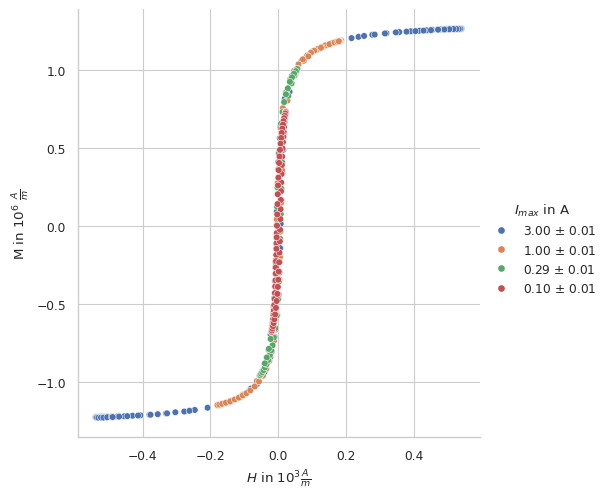

In [11]:
heizbar_all = pd.concat([heizbar_a,heizbar_b,heizbar_c,heizbar_d])
plot(heizbar_all)

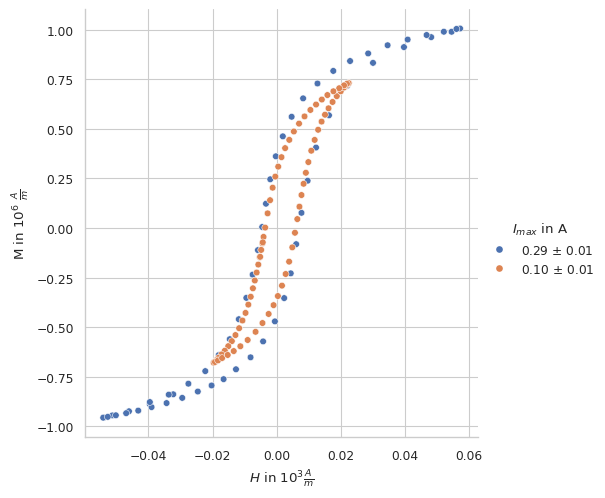

In [12]:
plot(pd.concat([heizbar_c,heizbar_d]))

Alle Messungen in verschiedenen Plots

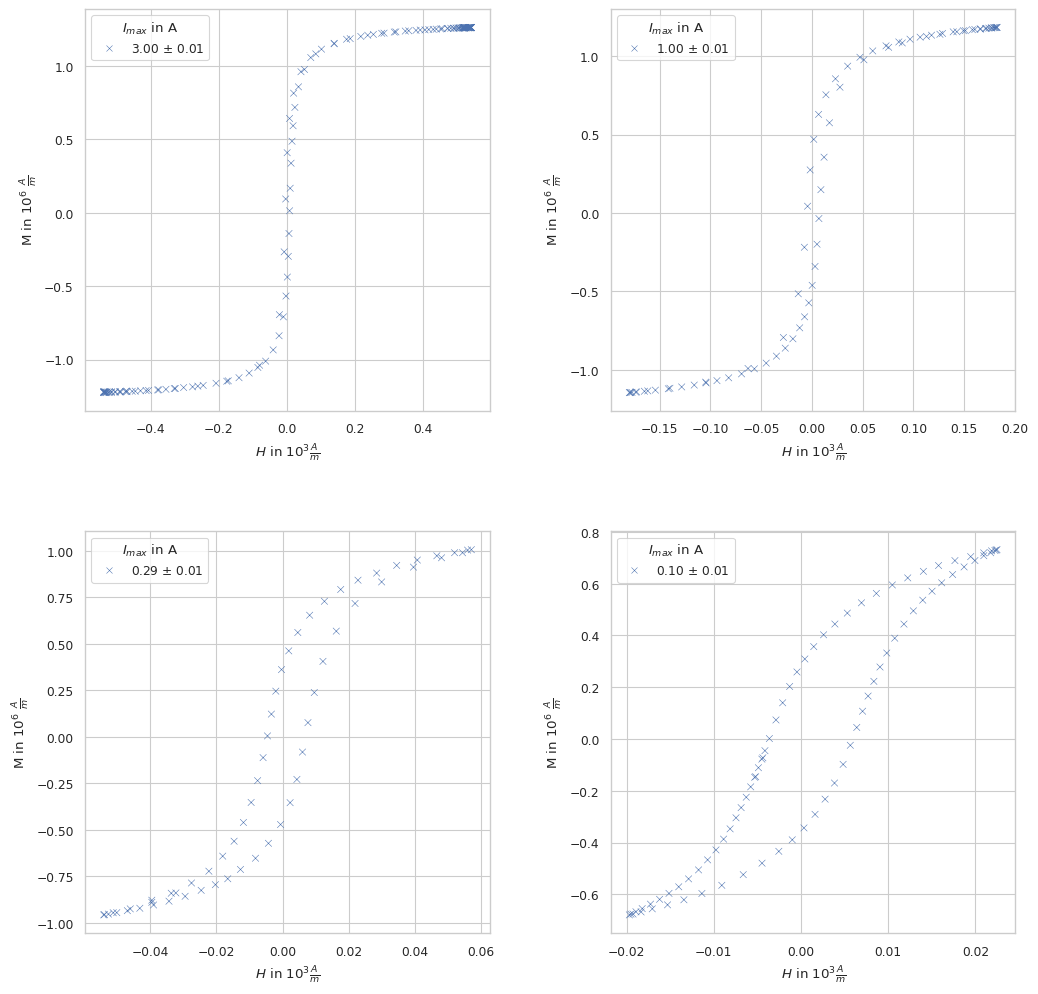

In [13]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# 4 subplots jeweils 1/2 Breite
# https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
ax = fig.add_subplot(2, 2, 1)
subplot(heizbar_a, axis=ax)

ax = fig.add_subplot(2, 2, 2)
subplot(heizbar_b, axis=ax)

ax = fig.add_subplot(2, 2, 3)
subplot(heizbar_c, axis=ax)

ax = fig.add_subplot(2, 2, 4)
subplot(heizbar_d, axis=ax)

plt.show()

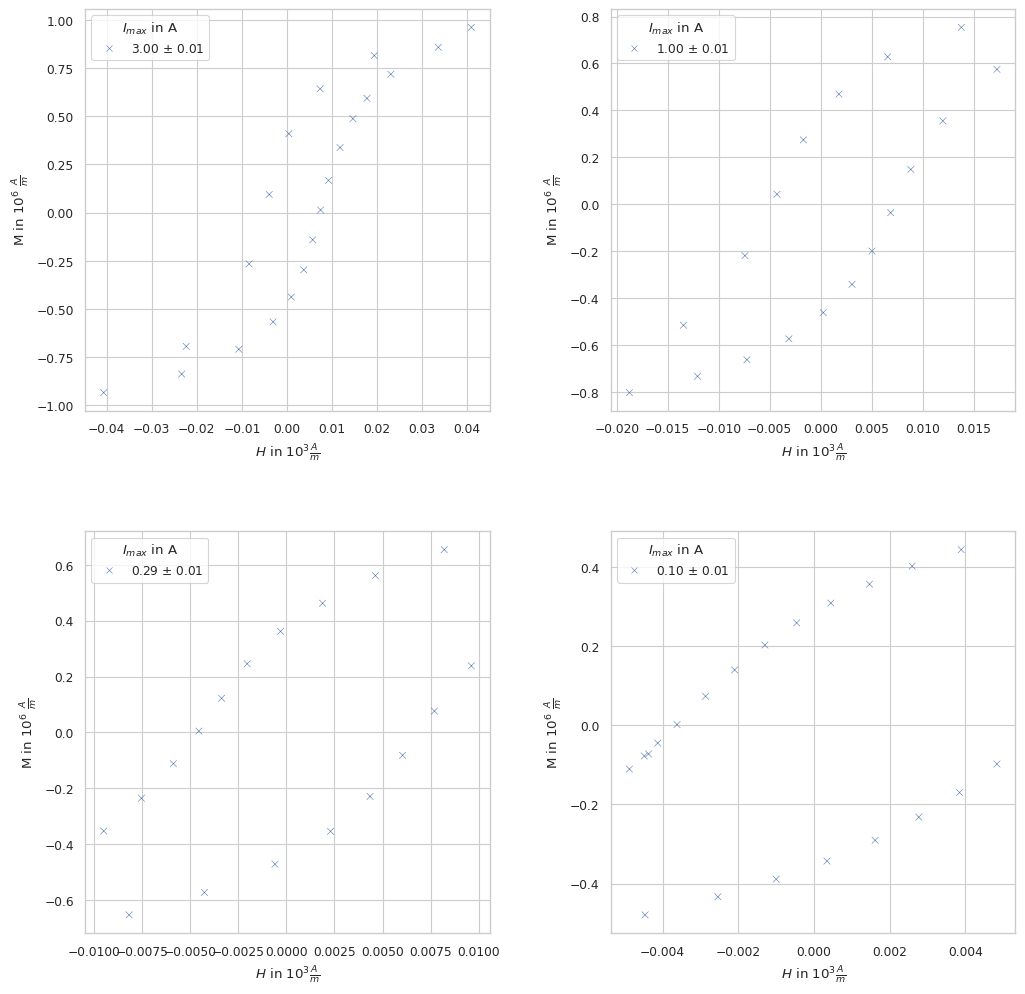

In [14]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# 4 subplots jeweils 1/2 Breite
# https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
ax = fig.add_subplot(2, 2, 1)
subplot(heizbar_a[heizbar_a[H_column].abs() < 0.05], axis=ax)

ax = fig.add_subplot(2, 2, 2)
subplot(heizbar_b[heizbar_b[H_column].abs() < 0.02], axis=ax)

ax = fig.add_subplot(2, 2, 3)
subplot(heizbar_c[heizbar_c[H_column].abs() < 0.01], axis=ax)

ax = fig.add_subplot(2, 2, 4)
subplot(heizbar_d[heizbar_d[H_column].abs() < 0.005], axis=ax)

plt.show()

In [15]:
heizbar_a['Ringkern'] = 'ohne Spalt'

## 3.3.2

In [16]:
komm_a = pd.read_csv('3.3.2.a.csv', sep='\t')
komm_b = pd.read_csv('3.3.2.b.csv', sep='\t')

In [17]:
komm_a[H_column] = komm_a['H'].apply(H)
komm_b[H_column] = komm_b['H'].apply(H)

komm_a[M_column] = komm_a['M'].apply(M)
komm_b[M_column] = komm_b['M'].apply(M)

In [18]:
komm_a[I_column] = r'3.00 $\pm$ 0.01'
komm_b[I_column] = r'0.10 $\pm$ 0.01'

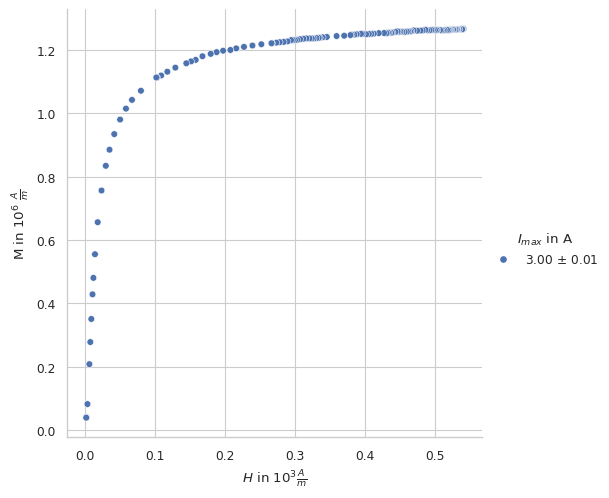

In [19]:
plot(komm_a)
# fit_end = sns.lmplot(
#     data=komm_a[komm_a[H_column] > 0.2],
#     x=H_column,
#     y=M_column,
#     hue=I_column,
#     height=5,
#     legend='full'
# )

In [20]:
# fit_start = sns.lmplot(
#     data=komm_b[(komm_b[H_column] > -0.011) & (komm_b[H_column] < 0)],
#     x=H_column,
#     y=M_column,
#     hue=I_column,
#     height=5,
#     legend='full',
#     fit_reg=True
# )

In [21]:
def regression(df, ax, index):
    slope, intercept, _, slope_err, intercept_err = linregress(df[H_column], df[M_column])
    x_vals = [df[H_column].min(), df[H_column].max()]
    y_vals = [ slope * x + intercept for x in x_vals ]
    subplot(df, axis=ax)

    label = r"$\chi_\mathrm{" + index + r"}\cdot H \pm " + "M_\mathrm{0," + index + '}$'
    sns.lineplot(x=x_vals, y=y_vals, ax=ax, label=label)
    ax.legend()
    
    print(f'slope {index}:', slope, r'\pm', slope_err)
    print(f'intercept {index}:', intercept, r'\pm', intercept_err)

slope low: 45.24608556109162 \pm 2.4987901598319533e-70
intercept low: -0.005873737273931756 \pm 0.2858802969771181
slope high: 0.13435596888357718 \pm 3.680030287083996e-58
intercept high: 1.1957831979185296 \pm 0.00274145641104781


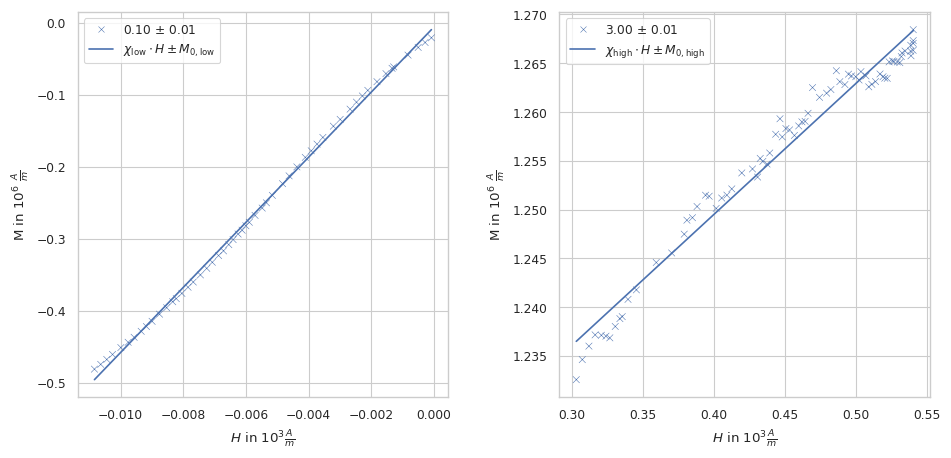

In [22]:
fig = plt.figure(figsize=(11,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax = fig.add_subplot(1, 2, 1)
regression(komm_b[(komm_b[H_column] > -0.011) & (komm_b[H_column] < 0)], ax=ax, index='low')

ax = fig.add_subplot(1, 2, 2)
regression(komm_a[komm_a[H_column] > 0.3], ax=ax, index='high')

## 3.3.3

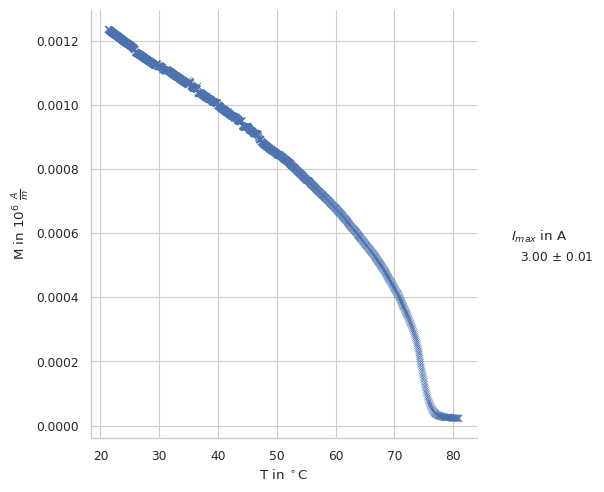

In [23]:
data = pd.read_csv('3.3.3.csv', sep='\t')
data[I_column] = r'3.00 $\pm$ 0.01'
T_column = r'T in $^\circ$C'
data[T_column] = data['T']
data[M_column] = data['M'].apply(M)
data[M_column] /= 1e3


sns.relplot(
    data=data,
    x=T_column,
    y=M_column,
    height=5,
    hue=I_column,
    marker='x',
    legend='full'
);

Nahaufnahme

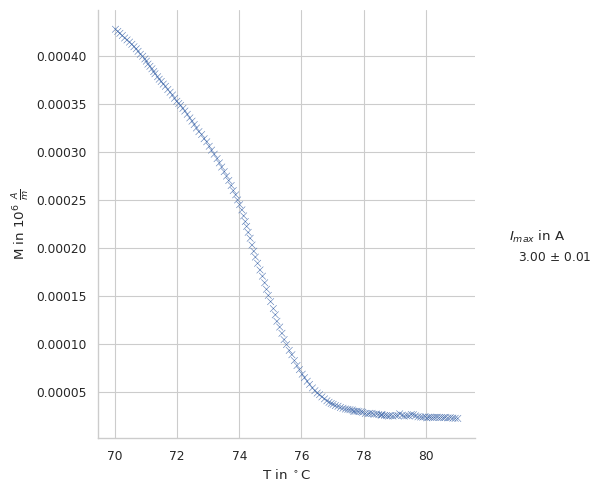

In [24]:
sns.relplot(
    data=data[data[T_column] > 70],
    x=T_column,
    y=M_column,
    height=5,
    hue=I_column,
    marker='x',
    legend='full'
);

## 3.3.3

Messungsdetails:
* 3.4.1: 0.94A
* 3.4.2: 3.0A, 1mm
* 3.4.3: 2.12A, 0.5mm
* 3.4.4: 1.27A, 0.2mm
* 3.4.5: 1.0A, 0.125mm
* 3.4.6: 0.79A, 0.075mm
* 3.4.7: 0.50A, 0.0mm

In [25]:
spalt_a = pd.read_csv('3.4.1.csv', sep='\t')
spalt_b = pd.read_csv('3.4.2.csv', sep='\t')
spalt_c = pd.read_csv('3.4.3.csv', sep='\t')
spalt_d = pd.read_csv('3.4.4.csv', sep='\t')
spalt_e = pd.read_csv('3.4.5.csv', sep='\t')
spalt_f = pd.read_csv('3.4.6.csv', sep='\t')
spalt_g = pd.read_csv('3.4.7.csv', sep='\t')

Fixme: Die Länge des Spalts muss eingerechnet werden.

In [31]:
def H_spalt(U):
    U_max = spalt_a.H.max()
    n_p=54
    r=1.5/100 # m
    return n_p/(2 * math.pi * r) * (3.0/U_max) * U / 1e3

In [32]:
spalt_a[H_column] = spalt_a['H'].apply(H_spalt)
spalt_b[H_column] = spalt_b['H'].apply(H_spalt)
spalt_c[H_column] = spalt_c['H'].apply(H_spalt)
spalt_d[H_column] = spalt_d['H'].apply(H_spalt)
spalt_e[H_column] = spalt_e['H'].apply(H_spalt)
spalt_f[H_column] = spalt_f['H'].apply(H_spalt)
spalt_g[H_column] = spalt_g['H'].apply(H_spalt)

spalt_a[M_column] = spalt_a['M'].apply(M)
spalt_b[M_column] = spalt_b['M'].apply(M)
spalt_c[M_column] = spalt_c['M'].apply(M)
spalt_d[M_column] = spalt_d['M'].apply(M)
spalt_e[M_column] = spalt_e['M'].apply(M)
spalt_f[M_column] = spalt_f['M'].apply(M)
spalt_g[M_column] = spalt_g['M'].apply(M)

In [33]:
spalt_a['Ringkern'] = 'mit Spalt'

S_column = 'Spaltbreite'
spalt_b[S_column] = r'2.00 mm'
spalt_c[S_column] = r'1.00 mm'
spalt_d[S_column] = r'0.40 mm'
spalt_e[S_column] = r'0.25 mm'
spalt_f[S_column] = r'0.15 mm'
spalt_g[S_column] = r'0.00 mm'

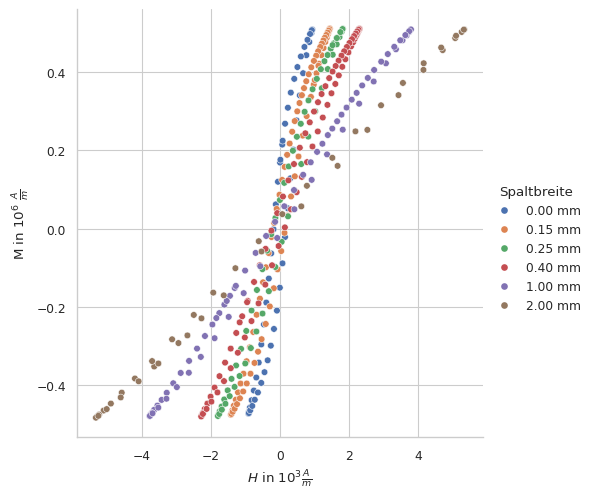

In [34]:
plot(pd.concat([spalt_g,spalt_f,spalt_e,spalt_d,spalt_c,spalt_b]), hue_column=S_column)

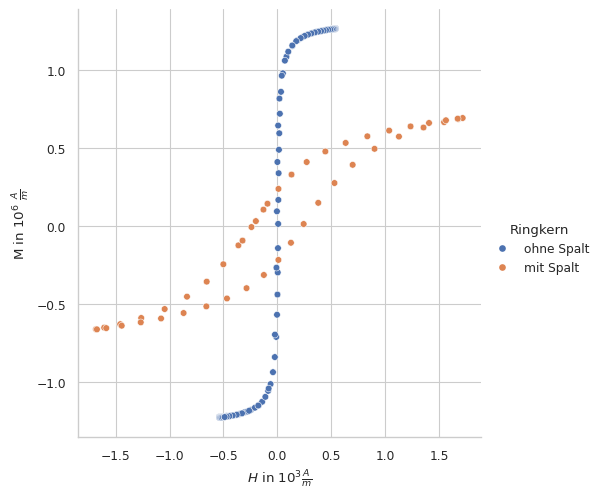

In [35]:
plot(pd.concat([heizbar_a, spalt_a]), hue_column='Ringkern')